# Nome : Alberto Rodrigues Ferreira
# Matrícula : 391278

In [1]:
require(DMwR)
require(ggplot2)

Loading required package: DMwR
Loading required package: lattice
Loading required package: grid
Loading required package: ggplot2


In [2]:
conexao=url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data")

In [3]:
dados=read.csv(conexao,header=F)

In [4]:
(colnames(dados)=c("class","age","menopause","tumor-size","inv-nodes","node-caps","deg-malig"
                   ,"breast","breast-quad","irradiat"))

[1] "class"       "age"         "menopause"   "tumor-size"  "inv-nodes"  
 [6] "node-caps"   "deg-malig"   "breast"      "breast-quad" "irradiat"

In [5]:
dados2=dados

In [6]:
head(dados2)

class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


# Alterando o valor faltante de "?" para NA que é como as funções do R interpretam valores faltantes.

In [7]:
for(i in 1:ncol(dados2))
{
  x=which(dados2[,i]=="?")
  dados2[x,i]=NA
}

In [8]:
summary(dados2)

                  class        age       menopause     tumor-size inv-nodes  
 no-recurrence-events:201   20-29: 1   ge40   :129   30-34  :60   0-2  :213  
 recurrence-events   : 85   30-39:36   lt40   :  7   25-29  :54   12-14:  3  
                            40-49:90   premeno:150   20-24  :50   15-17:  6  
                            50-59:96                 15-19  :30   24-26:  1  
                            60-69:57                 10-14  :28   3-5  : 36  
                            70-79: 6                 40-44  :22   6-8  : 17  
                                                     (Other):42   9-11 : 10  
 node-caps    deg-malig       breast       breast-quad  irradiat 
 ?   :  0   Min.   :1.000   left :152   ?        :  0   no :218  
 no  :222   1st Qu.:2.000   right:134   central  : 21   yes: 68  
 yes : 56   Median :2.000               left_low :110            
 NA's:  8   Mean   :2.049               left_up  : 97            
            3rd Qu.:3.000               right_

In [9]:
table(is.na(dados2))


FALSE  TRUE 
 2851     9 

In [10]:
apply(dados2,2,function (x) sum(is.na(x)))

class         age   menopause  tumor-size   inv-nodes   node-caps 
          0           0           0           0           0           8 
  deg-malig      breast breast-quad    irradiat 
          0           0           1           0

# A coluna breast-quad é algumas vezes inconsistente com a coluna breast, então decidi retirá-la.

In [11]:
dados[,c(8,9)]

breast,breast-quad
left,left_low
right,right_up
left,left_low
right,left_up
right,right_low
left,left_low
left,left_low
left,left_low
left,left_low
right,left_up


In [12]:
dados2=dados2[,-which(colnames(dados2)=="breast-quad")]

# Função de imputação por knn

In [13]:
dados2=knnImputation(dados2,k=10,scale=T)

In [14]:
table(is.na(dados2))


FALSE 
 2574 

In [15]:
apply(dados2,2,function (x) sum(is.na(x)))

class        age  menopause tumor-size  inv-nodes  node-caps  deg-malig 
         0          0          0          0          0          0          0 
    breast   irradiat 
         0          0

In [16]:
a=c()
for(i in 1:ncol(dados2))
{
  x=cbind(class(dados2[,i]),colnames(dados2)[i])
  a=rbind(a,x)
}
a

factor,class
factor,age
factor,menopause
factor,tumor-size
factor,inv-nodes
factor,node-caps
integer,deg-malig
factor,breast
factor,irradiat


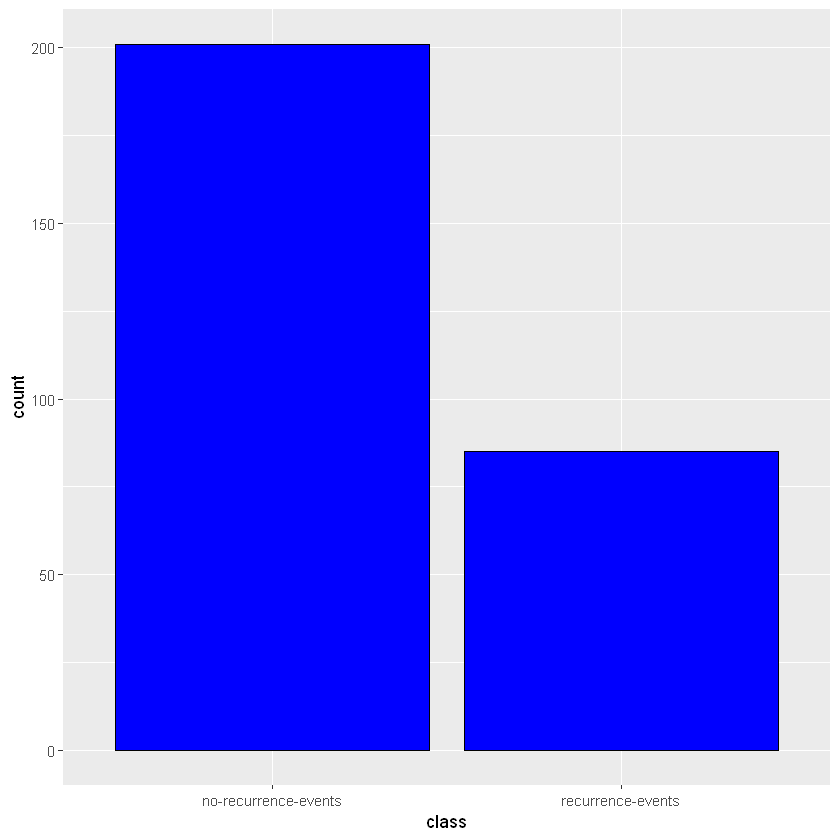

In [17]:
ggplot(dados2)+aes(class)+geom_bar(fill="blue",color="black")

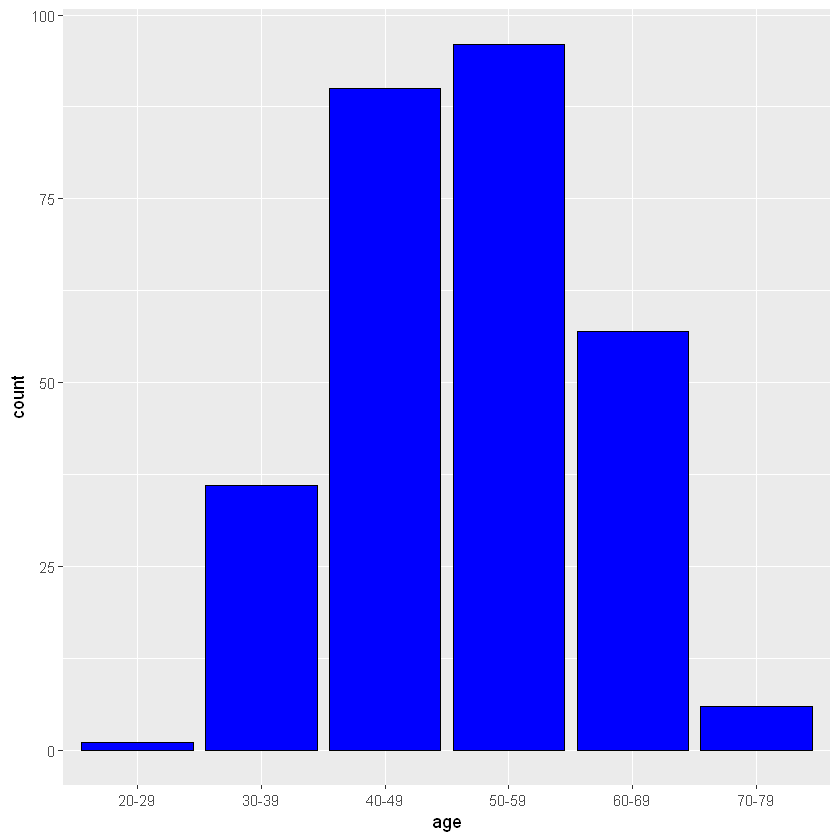

In [18]:
ggplot(dados2)+aes(age)+geom_bar(fill="blue",color="black")

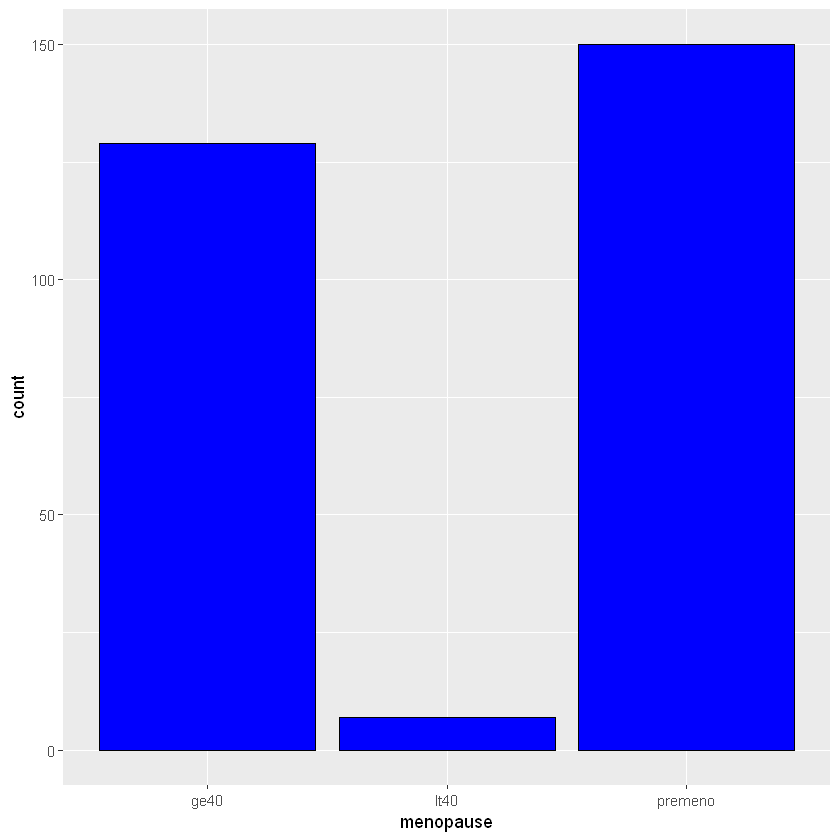

In [19]:
ggplot(dados2)+aes(menopause)+geom_bar(fill="blue",color="black")

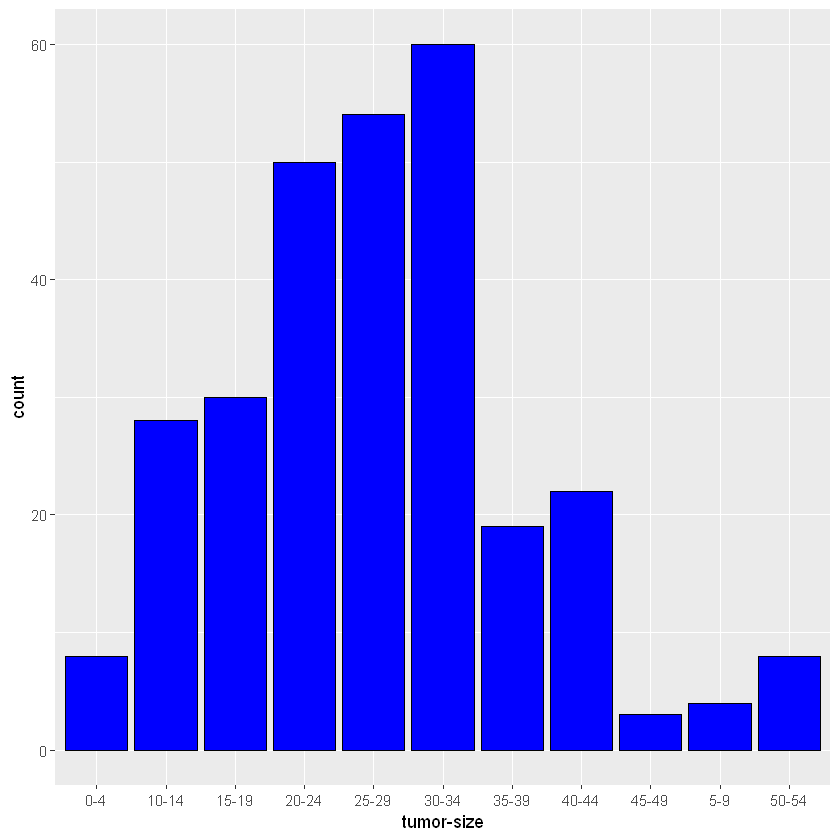

In [20]:
ggplot(dados2)+aes(`tumor-size`)+geom_bar(fill="blue",color="black")

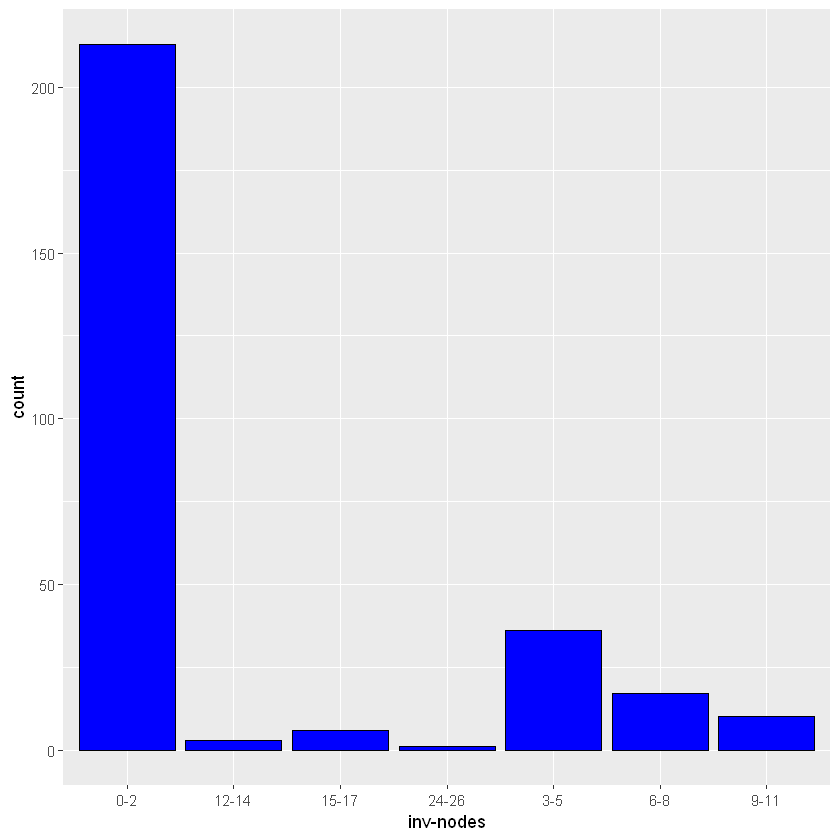

In [21]:
ggplot(dados2)+aes(`inv-nodes`)+geom_bar(fill="blue",color="black")

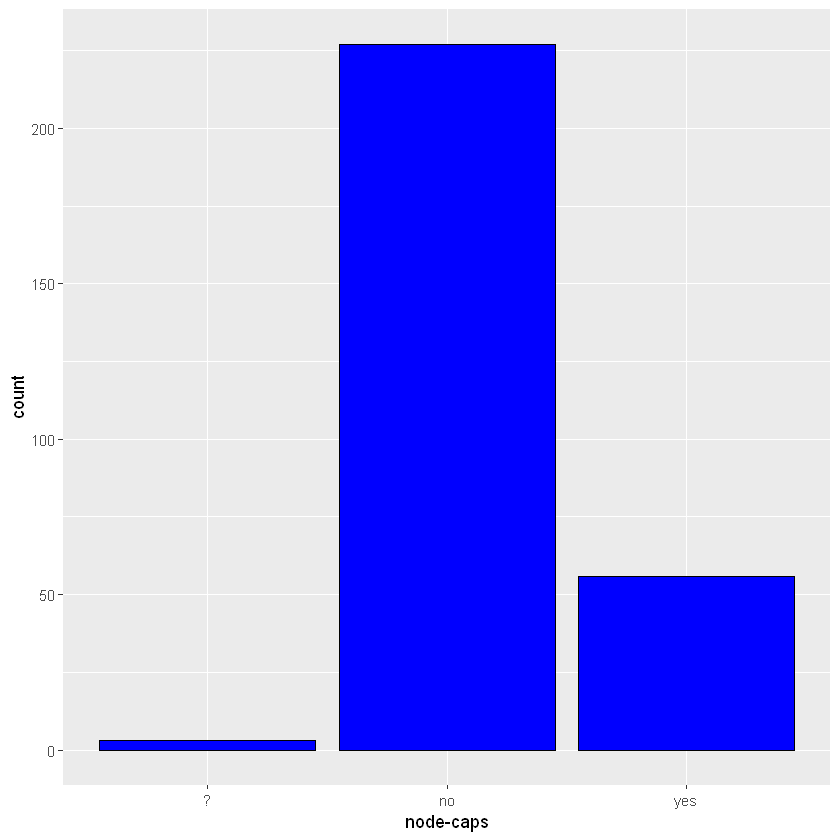

In [22]:
ggplot(dados2)+aes(`node-caps`)+geom_bar(fill="blue",color="black")

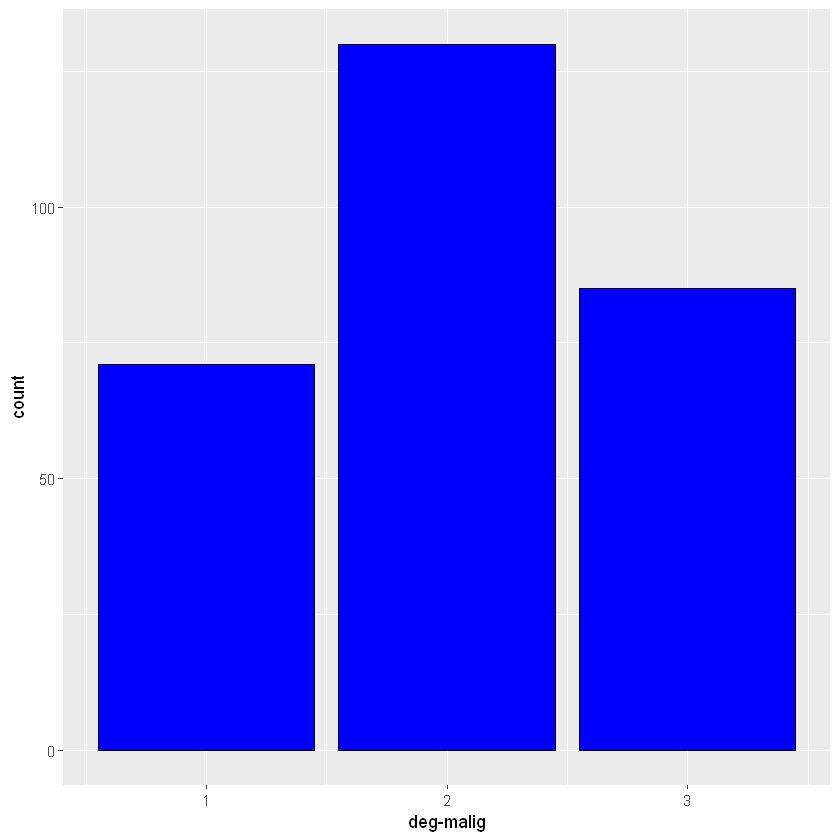

In [23]:
ggplot(dados2)+aes(`deg-malig`)+geom_bar(fill="blue",color="black")

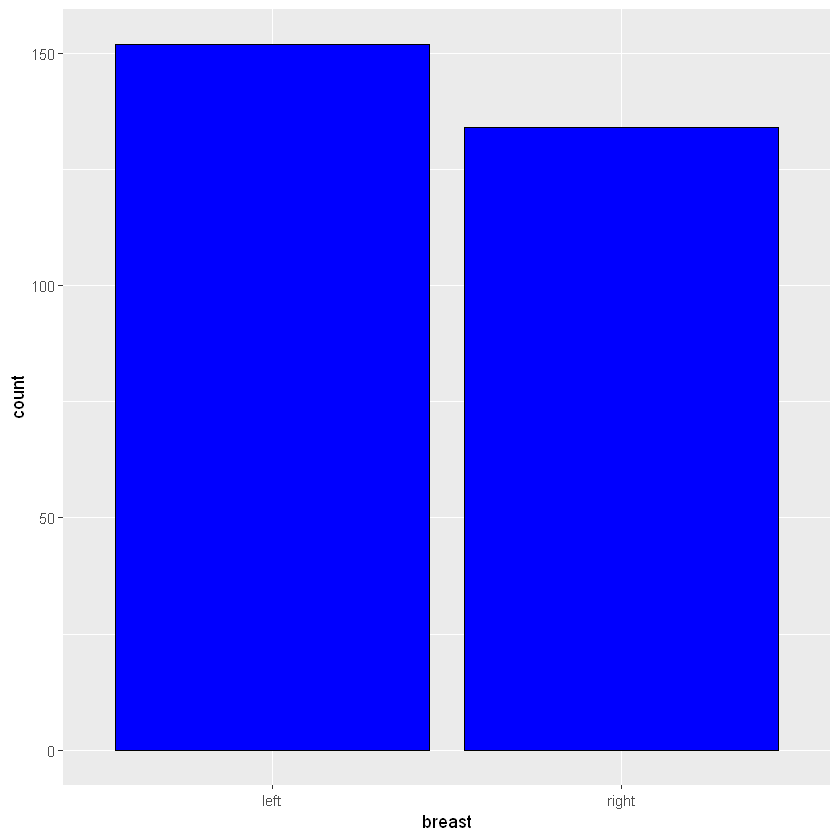

In [24]:
ggplot(dados2)+aes(breast)+geom_bar(fill="blue",color="black")

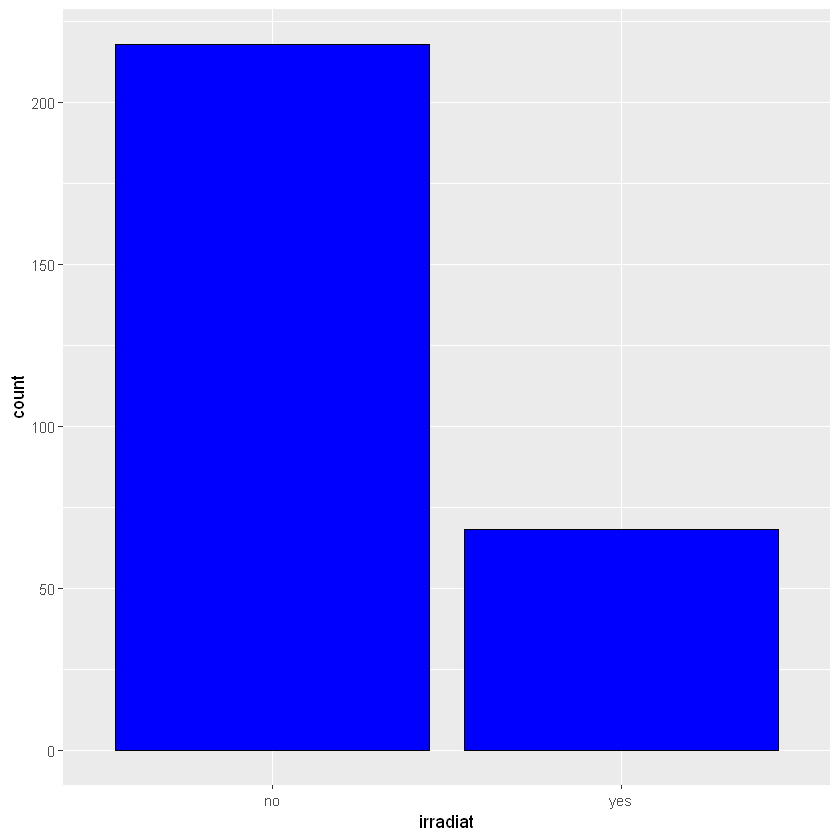

In [25]:
ggplot(dados2)+aes(irradiat)+geom_bar(fill="blue",color="black")